In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import roc_curve
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,  PolynomialFeatures   
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix

In [2]:
data= pd.read_csv("./data.csv")

feature_cols=['location',	'country' ,	'gender' ,	'age' ,	'vis_wuhan',	'from_wuhan',	'symptom1'	,'symptom2'	,'symptom3'	,'symptom4'	,'symptom5'	,'symptom6', 	'diff_sym_hos'
]
x=data[feature_cols]
y=data.result
# Get 70% of the dataset as the training set. Put the remaining 30% in temporary variables: x_test and y_test.
x_train, x_both, y_train, y_both = train_test_split(x, y, test_size=0.30, random_state=3)
# Split the 30% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_both, y_both, test_size=0.50, random_state=3)
#another approach to divide data 
#train, validate, test = np.split(df.sample(frac=1, random_state=42), #60 training 20 validation 20 test 
                      # [int(.6*len(df)), int(.8*len(df))]) 


Before tuning the hyperparameters

In [3]:
clf10 = DecisionTreeClassifier()
clf10 = clf10.fit(x_train,y_train)
#Predict the response for test dataset
y_pred10 = clf10.predict(x_cv)
#Accuracy 
print("Accuracy:",metrics.accuracy_score(y_cv, y_pred10))
#Confusion Matrix
print(metrics.confusion_matrix(y_cv, y_pred10))
#Classification Report
print(metrics.classification_report(y_cv, y_pred10))
#roc_auc_
print(metrics.roc_auc_score(y_cv, y_pred10))

Accuracy: 0.9767441860465116
[[115   1]
 [  2  11]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       116
           1       0.92      0.85      0.88        13

    accuracy                           0.98       129
   macro avg       0.95      0.92      0.93       129
weighted avg       0.98      0.98      0.98       129

0.918766578249337


tuning the hyperparameters manually

In [3]:
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_cv)

In [4]:
#Accuracy 
print("Accuracy:",metrics.accuracy_score(y_cv, y_pred))



Accuracy: 0.9689922480620154


In [5]:
print(confusion_matrix(y_cv, y_pred))

[[115   1]
 [  3  10]]


In [6]:
print("roc score",metrics.roc_auc_score(y_cv,y_pred))

roc score 0.8803050397877984


In [7]:
print(classification_report(y_cv, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       116
           1       0.91      0.77      0.83        13

    accuracy                           0.97       129
   macro avg       0.94      0.88      0.91       129
weighted avg       0.97      0.97      0.97       129



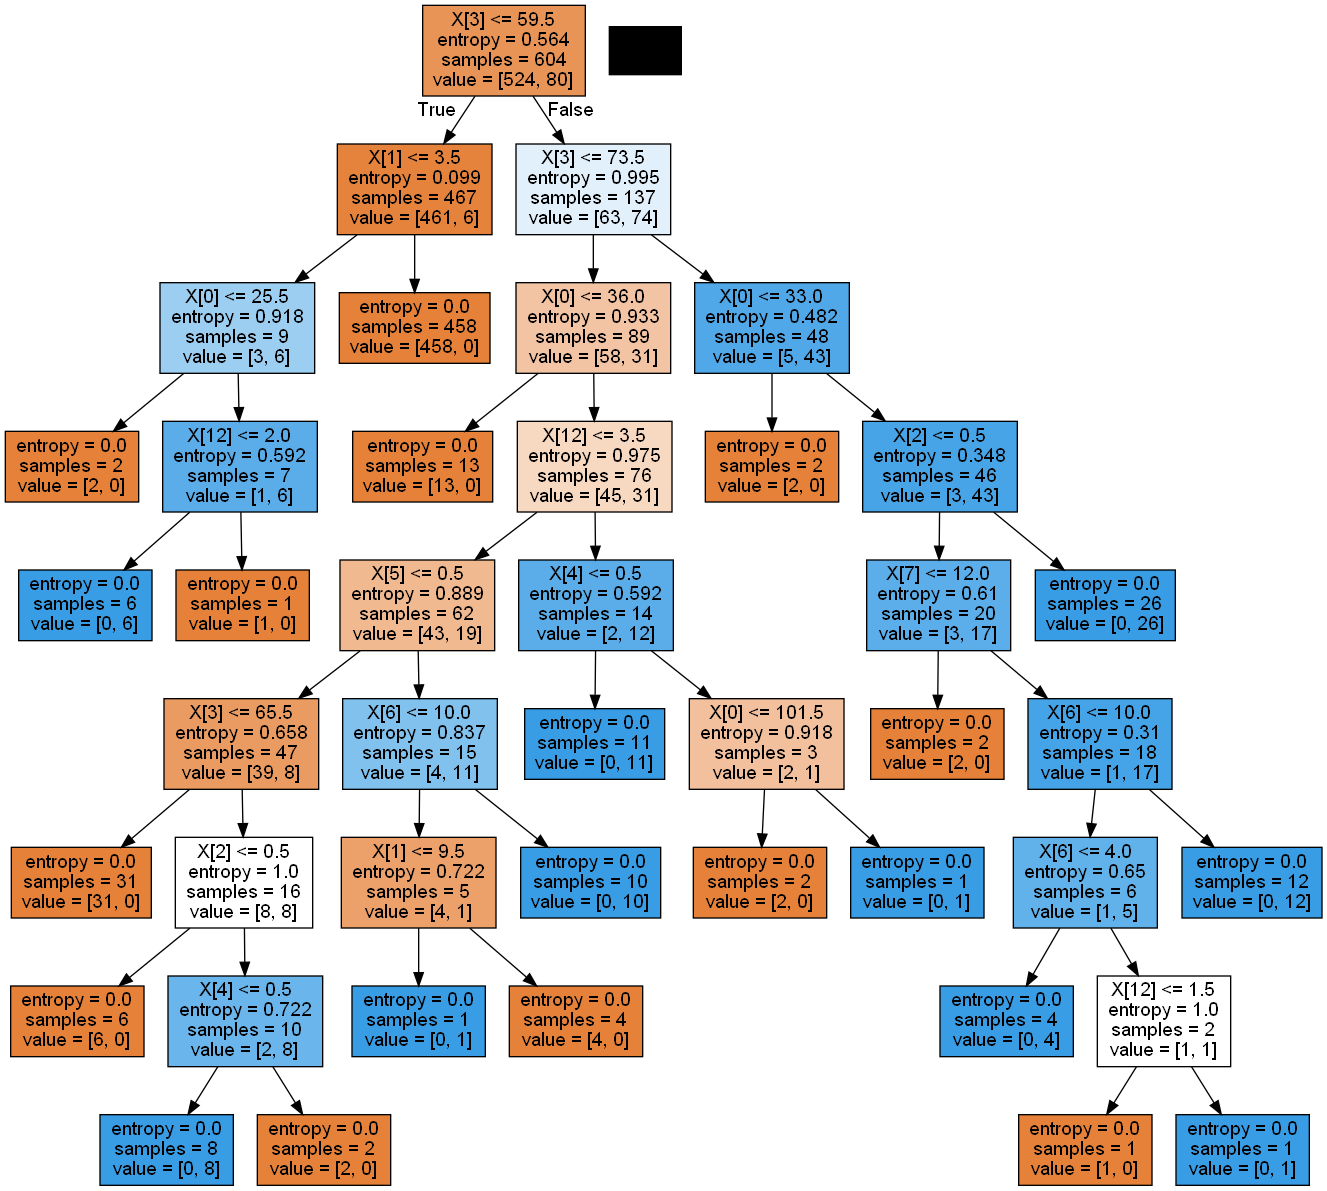

In [8]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [9]:
clf2 = DecisionTreeClassifier(criterion='entropy',max_depth=4)
clf2 = clf2.fit(x_train,y_train)
#Predict the response for test dataset
y_pred2 = clf2.predict(x_cv)

In [10]:
#Accuracy 
print("Accuracy:",metrics.accuracy_score(y_cv, y_pred2))
print("roc score",metrics.roc_auc_score(y_cv,y_pred2))
print(classification_report(y_cv, y_pred2))

Accuracy: 0.937984496124031
roc score 0.7947612732095491
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       116
           1       0.73      0.62      0.67        13

    accuracy                           0.94       129
   macro avg       0.84      0.79      0.82       129
weighted avg       0.93      0.94      0.94       129



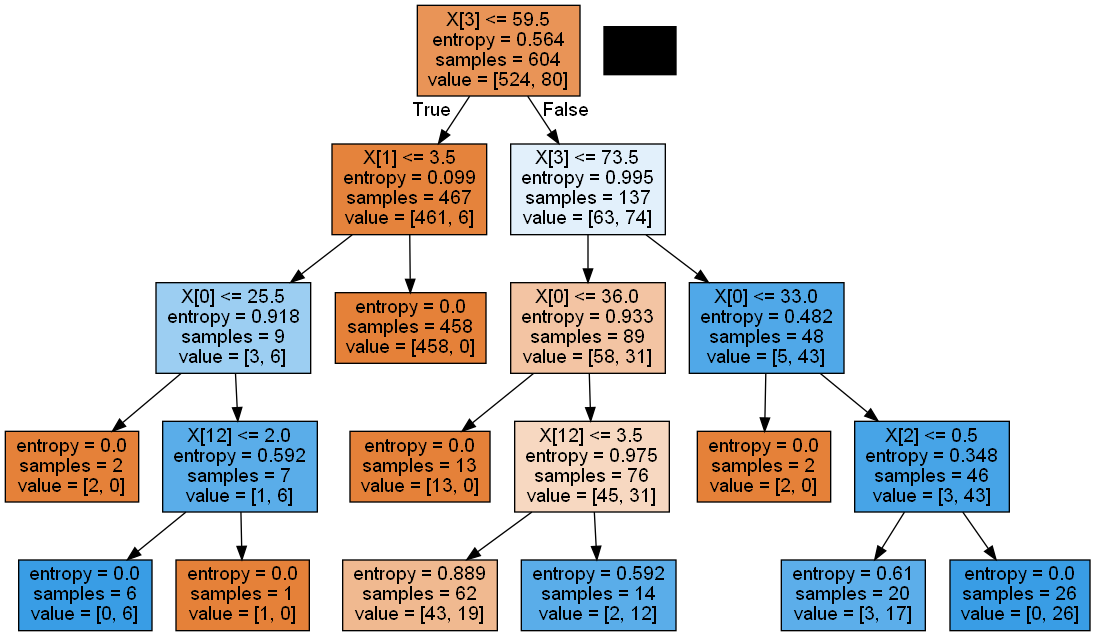

In [11]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [12]:
clf3 = DecisionTreeClassifier(criterion='log_loss')
#log loss has higher accuracy
clf3 = clf3.fit(x_train,y_train)
#Predict the response for test dataset
y_pred3 = clf3.predict(x_cv)

In [13]:
#Accuracy 
print("Accuracy:",metrics.accuracy_score(y_cv, y_pred3))
print("roc score",metrics.roc_auc_score(y_cv,y_pred3))
print(classification_report(y_cv, y_pred3))

Accuracy: 0.9689922480620154
roc score 0.8803050397877984
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       116
           1       0.91      0.77      0.83        13

    accuracy                           0.97       129
   macro avg       0.94      0.88      0.91       129
weighted avg       0.97      0.97      0.97       129



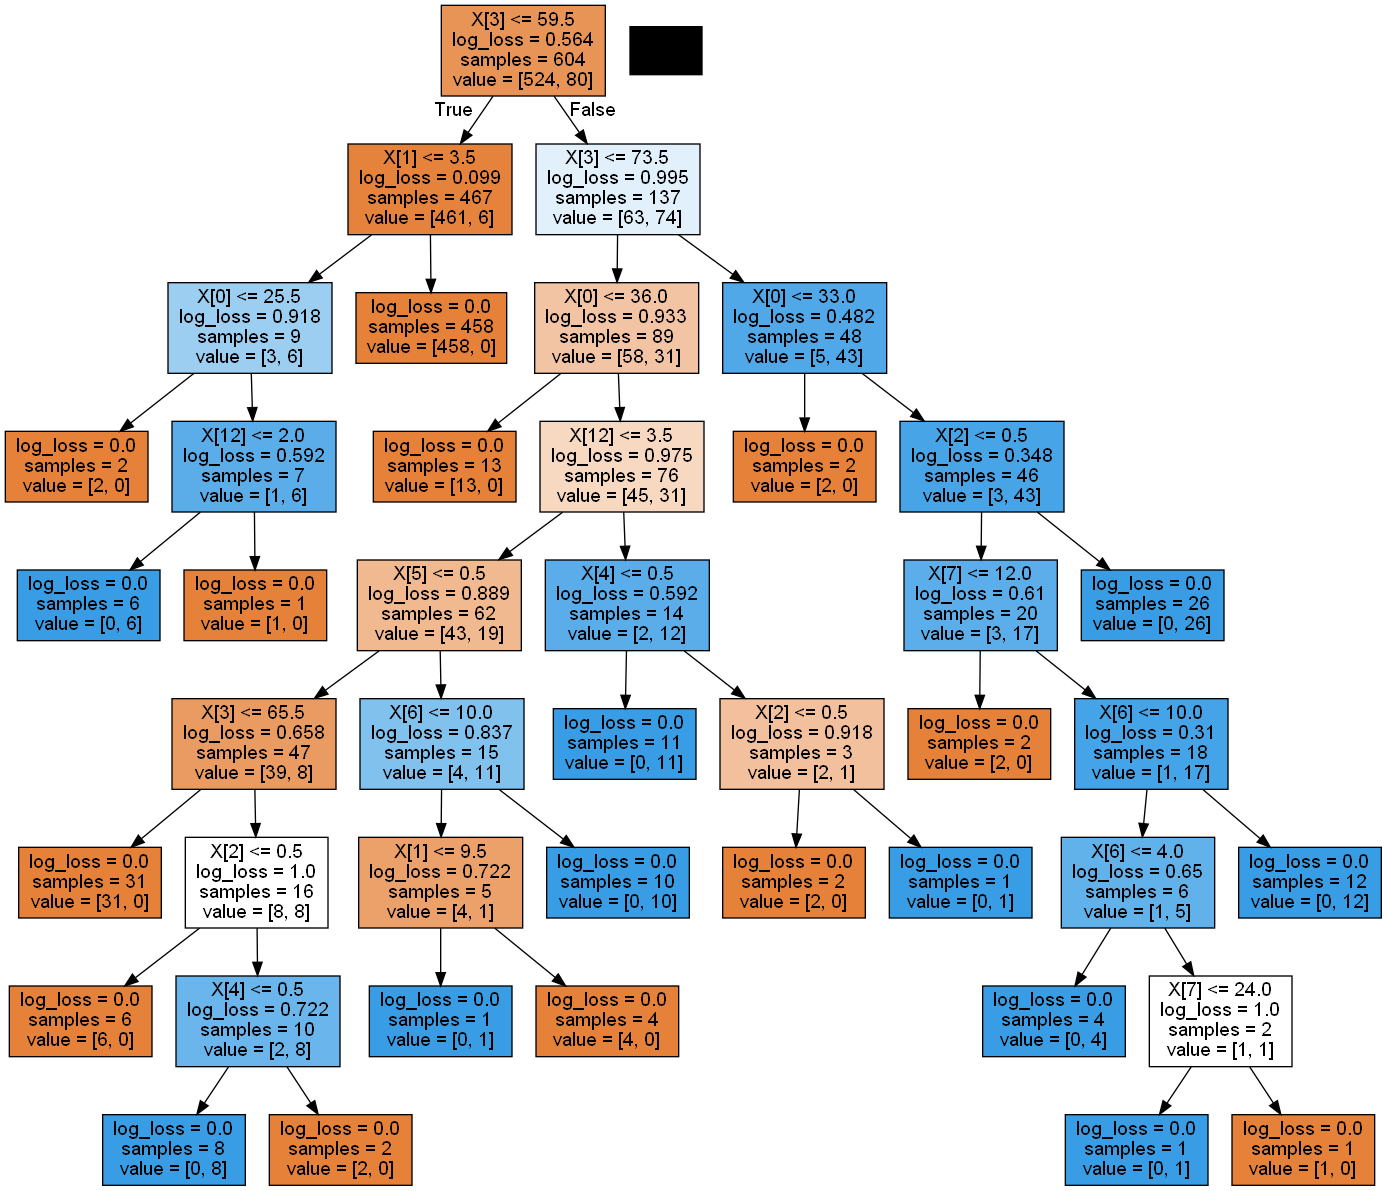

In [14]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf3, out_file=dot_data,  
                filled=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [15]:
clf4 = DecisionTreeClassifier(criterion='log_loss',max_features="log2")
#log loss has higher accuracy
clf4 = clf4.fit(x_train,y_train)
#Predict the response for test dataset
y_pred4 = clf4.predict(x_cv)

In [16]:
#Accuracy 
print("Accuracy:",metrics.accuracy_score(y_cv, y_pred4))
print("roc score",metrics.roc_auc_score(y_cv,y_pred4))
print(classification_report(y_cv, y_pred4))

Accuracy: 0.9612403100775194
roc score 0.84184350132626
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       116
           1       0.90      0.69      0.78        13

    accuracy                           0.96       129
   macro avg       0.93      0.84      0.88       129
weighted avg       0.96      0.96      0.96       129



In [17]:
clf5 = DecisionTreeClassifier(criterion='entropy',max_features="log2")
#log loss has higher accuracy
clf5 = clf5.fit(x_train,y_train)
#Predict the response for test dataset
y_pred5 = clf5.predict(x_cv)

In [18]:
#Accuracy 
print("Accuracy:",metrics.accuracy_score(y_cv, y_pred5))
print("roc score",metrics.roc_auc_score(y_cv,y_pred5))
print(classification_report(y_cv, y_pred5))

Accuracy: 0.9534883720930233
roc score 0.9058355437665784
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       116
           1       0.73      0.85      0.79        13

    accuracy                           0.95       129
   macro avg       0.86      0.91      0.88       129
weighted avg       0.96      0.95      0.95       129



In [19]:
# setup parameter space
parameters = {'criterion':['gini','entropy','log_loss'],
              'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
          'min_samples_split':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,18,20]
              , 'random_state': [3]
              }


In [20]:
g1 = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1)
g1.fit(x_train,y_train)
cls_params1 = g1.best_params_
cls_params1

c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
4500 fits failed out of a total of 90000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4500 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py", line 

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 14,
 'random_state': 3}

In [21]:
model = g1.best_estimator_
y_pred6 = model.predict(x_cv)
print('accuracy score: %.2f' % metrics.accuracy_score(y_cv,y_pred6))
print('precision score: %.2f' % metrics.precision_score(y_cv,y_pred6))
print('recall score: %.2f' % metrics.recall_score(y_cv,y_pred6))
print('f1 score: %.2f' % metrics.f1_score(y_cv,y_pred6))
print("roc score",metrics.roc_auc_score(y_cv,y_pred6))
# print('computation time: %.2f' % duration)

accuracy score: 0.95
precision score: 0.80
recall score: 0.62
f1 score: 0.70
roc score 0.7990716180371352


In [23]:
from skopt import BayesSearchCV
parameters = {
    'criterion':['gini','entropy','log_loss'],
              'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
          'min_samples_split':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,18,20]
              , 'random_state': [3],
              'max_leaf_nodes': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,18,20]}
              
# create an instance of the bayesian search object
b1 = BayesSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_iter=30, random_state=42, n_jobs=-1)

# conduct randomized search over the parameter space
b1.fit(x_train,y_train)


# show best parameter configuration found for classifier
cls_params3 = b1.best_params_

cls_params3

OrderedDict([('criterion', 'log_loss'),
             ('max_depth', 14),
             ('max_leaf_nodes', 18),
             ('min_samples_leaf', 2),
             ('min_samples_split', 6),
             ('random_state', 3)])

In [24]:
model = b1.best_estimator_
y_pred7 = model.predict(x_cv)
print('accuracy score: %.2f' % metrics.accuracy_score(y_cv,y_pred7))
print('precision score: %.2f' % metrics.precision_score(y_cv,y_pred7))
print('recall score: %.2f' % metrics.recall_score(y_cv,y_pred7))
print('f1 score: %.2f' % metrics.f1_score(y_cv,y_pred7))
print("roc score",metrics.roc_auc_score(y_cv,y_pred7))

accuracy score: 0.96
precision score: 0.83
recall score: 0.77
f1 score: 0.80
roc score 0.8759946949602121


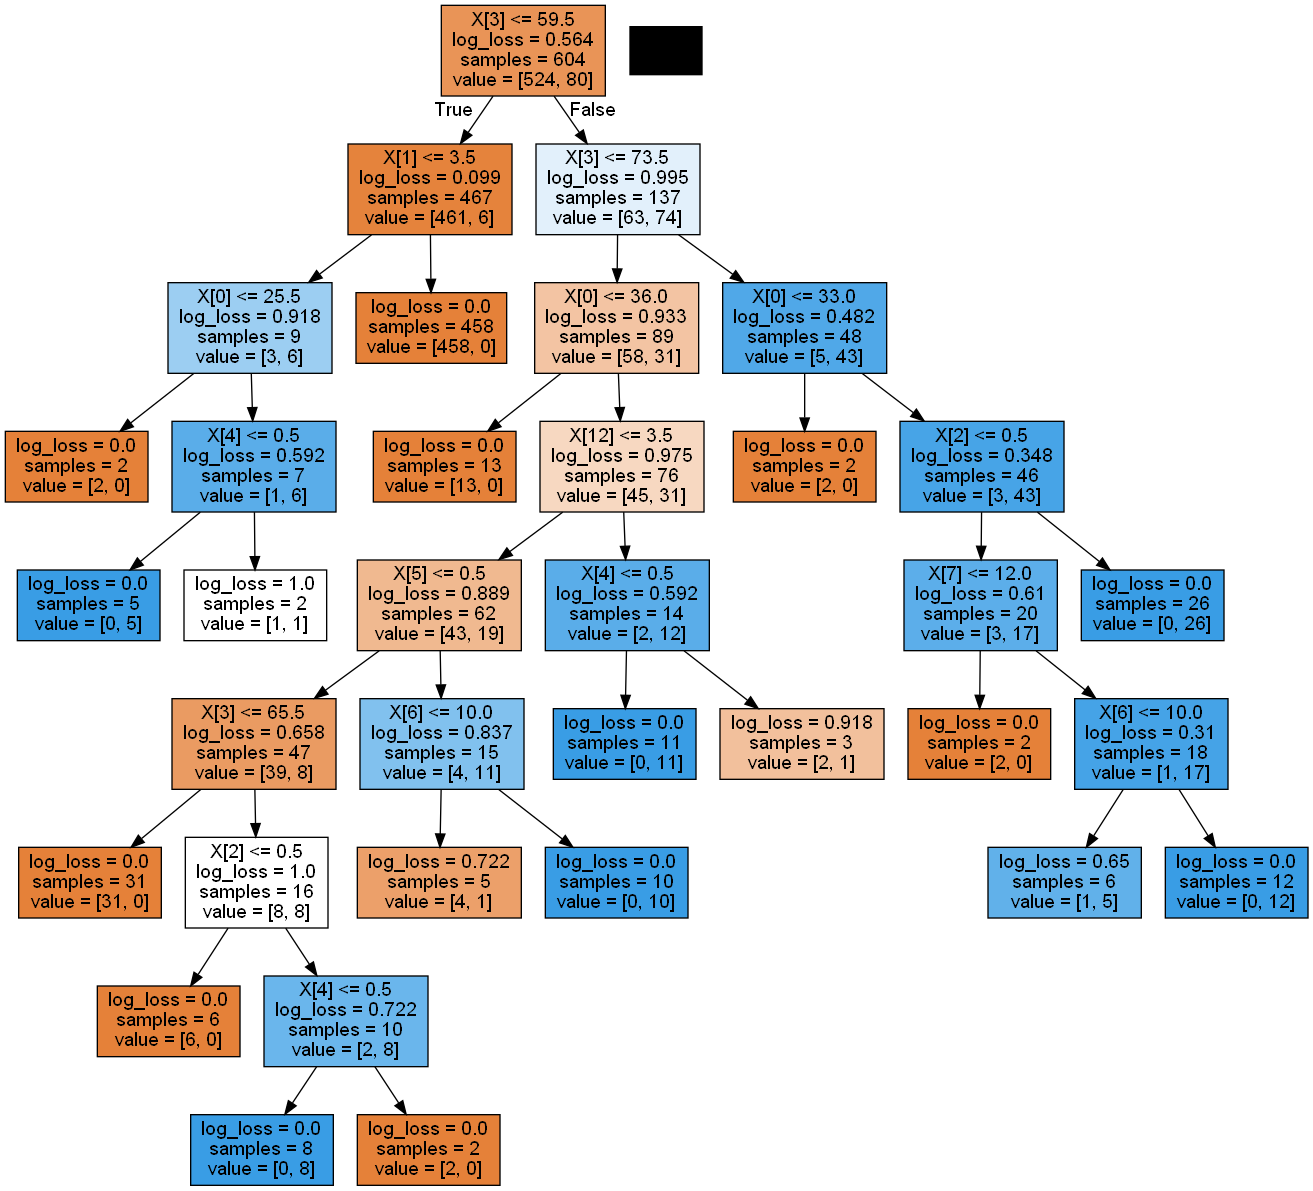

In [25]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())